Question 3
Support Vector Regression : Perform regression on Titanic Dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR

In [5]:
titanic = pd.read_csv('Titanic_data.csv')

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Visualizing the dataset

<AxesSubplot:xlabel='Survived', ylabel='count'>

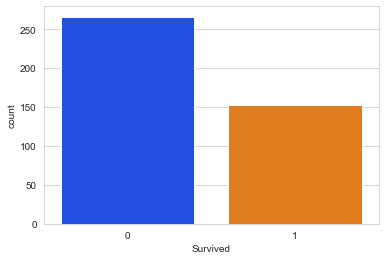

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=titanic, palette=sns.color_palette('bright'))

# More than half of the people travelled has died in the shipwreck

<AxesSubplot:xlabel='Survived', ylabel='count'>

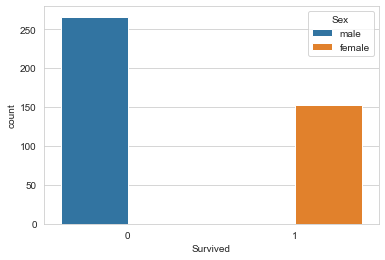

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=titanic, palette=sns.color_palette('tab10'))

# Most of the male passengers have died

<AxesSubplot:xlabel='Survived', ylabel='count'>

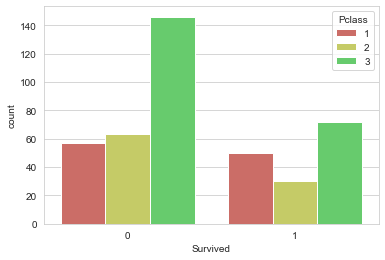

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=titanic, palette=sns.color_palette('hls'))

#Most of the third class passengers have died

<AxesSubplot:xlabel='Age', ylabel='Count'>

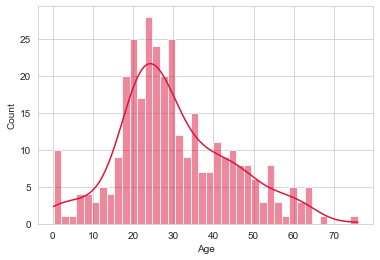

In [10]:
sns.histplot(titanic['Age'].dropna(), kde=True, color='crimson', bins=40)

# The average age is around 20-40

<AxesSubplot:xlabel='SibSp', ylabel='count'>

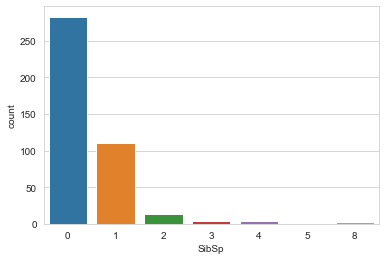

In [11]:
sns.countplot(x='SibSp', data=titanic)

# Most of the people didnt have any Siblings or spouse

## Cleaning the Data

In [12]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

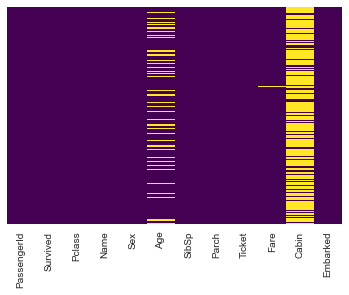

In [13]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

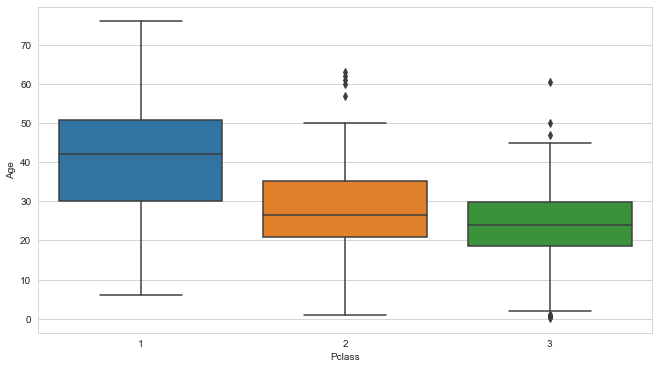

In [14]:
plt.figure(figsize=(11, 6))
sns.boxplot(x='Pclass', y='Age', data=titanic, palette='tab10')

In [15]:
# Finding the mean value of Age
ageMean = round(titanic['Age'].mean())
print(f"Average age of the passengers = {ageMean}")

Average age of the passengers = 30


In [16]:
titanic['Age'].fillna(value=ageMean, inplace=True)

<AxesSubplot:>

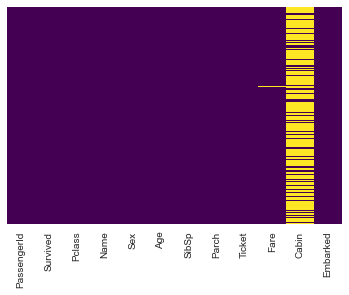

In [17]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [18]:
titanic.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:>

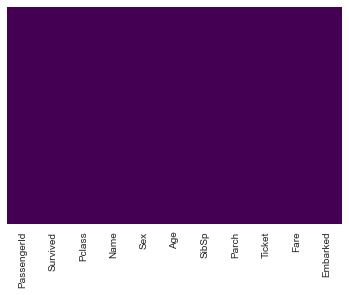

In [19]:
titanic.dropna(inplace=True)
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [20]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
sex = pd.get_dummies(titanic['Sex'], drop_first=True)
embark = pd.get_dummies(titanic['Embarked'], drop_first=True)

In [22]:
embark.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [23]:
titanic.drop(['PassengerId', 'Embarked', 'Sex', 'Name', 'Ticket'], axis=1, inplace=True)

In [24]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,34.5,0,0,7.8292
1,1,3,47.0,1,0,7.0000
2,0,2,62.0,0,0,9.6875
3,0,3,27.0,0,0,8.6625
4,1,3,22.0,1,1,12.2875


In [25]:
titanic = pd.concat([titanic, sex, embark], axis=1)
titanic.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,34.5,0,0,7.8292,1,1,0
1,1,3,47.0,1,0,7.0000,0,0,1
2,0,2,62.0,0,0,9.6875,1,1,0
3,0,3,27.0,0,0,8.6625,1,0,1
4,1,3,22.0,1,1,12.2875,0,0,1


In [26]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [28]:
svr_model = SVR(kernel = 'rbf' )
svr_model.fit(X_train, y_train)

SVR()

In [29]:
predictions = svr_model.predict(X_test)

In [30]:
print(f"Mean Squared Error = {mean_squared_error(y_test, predictions)}")

Mean Squared Error = 0.2724064617223696


In [31]:
print(f"Mean Absolute Error = {mean_absolute_error(y_test, predictions)}")

Mean Absolute Error = 0.3936008949753564


In [32]:
print(f"Accuracy of the Model = {(1 - mean_squared_error(y_test, predictions)) * 100}")

Accuracy of the Model = 72.75935382776304
